<a href="https://colab.research.google.com/github/DrakeData/House_Price_EDA/blob/main/MSDS422_Assignment3_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - House Prices: Advanced Regression Techniques (Continued)

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn import preprocessing
from numpy import array
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline
sns.set()

## Ingest
Here I will be ingesting the data that I cleaned up in assignment 1. The code for this cleanup process can be in [MSDS422_Assignment1.ipynb](https://github.com/DrakeData/House_Price_EDA/blob/main/MSDS422_Assignment1.ipynb).

### Import Data
'train_clean.csv' and 'test_clean.csv' is the cleaned up trained data set that worked on in Assignment 1.

In [38]:
df_train = pd.read_csv('./drive/MyDrive/Colab Notebooks/House_Price_EDA/data/train_clean.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqft,TotalBath,HouseAge,ReModeled
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,2566,3.5,5,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,2524,2.5,31,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,2706,3.5,7,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,2473,2.0,91,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,3343,3.5,8,0


In [39]:
df_test = pd.read_csv('./drive/MyDrive/Colab Notebooks/House_Price_EDA/data/test_clean.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSqft,TotalBath,HouseAge,ReModeled
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,1778.0,1.0,49,0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,2658.0,1.5,52,0
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,3,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,2557.0,2.5,13,1
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,4,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,2530.0,2.5,12,0
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,2560.0,2.0,18,0


## EDA
Before we pass the data through a model, we should explore the data and see if there is any additional work that needs to be done to it.

#### Train Set Check

In [40]:
df_train.shape

(1458, 85)

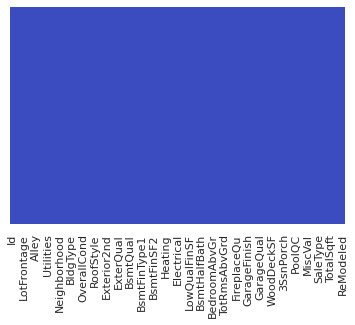

In [41]:
# Heatmap check for nulls in train set
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

In [42]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          1458 non-null   object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

In [43]:
# List of int64 values
int64_ls = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea',
            'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
            'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
            'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
            'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
            'YrSold', 'SalePrice', 'TotalSqft', 'TotalBath', 
            'HouseAge', 'ReModeled']

string_ls = ['Street', 'Alley', 'LotShape', 'LandContour', 
             'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
             'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
             'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
             'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
             'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
             'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
             'SaleCondition']

In [44]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          1458 non-null   object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

#### Test Set Check
It is good practice to check the test set to verify that it did not contain any additional null values in different columns compared to the train set.

In [45]:
df_test.shape

(1459, 84)

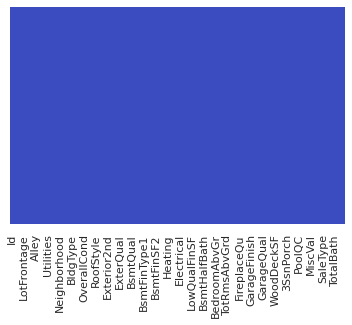

In [46]:
# Heatmap check for nulls in train set
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

In [47]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Check for skewness in the train data set

In [48]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

dataset_numeric = df_train.select_dtypes(include=numerics)

dataset_numeric.shape

(1458, 43)

In [49]:
dataset_numeric.skew()

Id                0.000165
MSSubClass        1.407011
LotFrontage       1.494021
LotArea          12.573925
OverallQual       0.200786
OverallCond       0.691035
YearBuilt        -0.612295
YearRemodAdd     -0.501838
MasVnrArea        2.696329
BsmtFinSF1        0.764789
BsmtFinSF2        4.251925
BsmtUnfSF         0.920903
TotalBsmtSF       0.511703
1stFlrSF          0.887637
2ndFlrSF          0.812957
LowQualFinSF      9.004955
GrLivArea         1.010992
BsmtFullBath      0.590358
BsmtHalfBath      4.100114
FullBath          0.031271
HalfBath          0.680051
BedroomAbvGr      0.212325
KitchenAbvGr      4.484883
TotRmsAbvGrd      0.660502
Fireplaces        0.632060
FireplaceQu       0.115596
GarageYrBlt      -0.693237
GarageCars       -0.342377
GarageArea        0.131748
WoodDeckSF        1.545805
OpenPorchSF       2.339829
EnclosedPorch     3.087164
3SsnPorch        10.297106
ScreenPorch       4.118929
PoolArea         15.948945
MiscVal          24.460085
MoSold            0.215432
Y

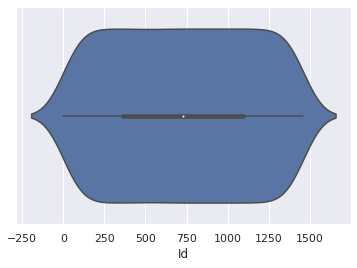

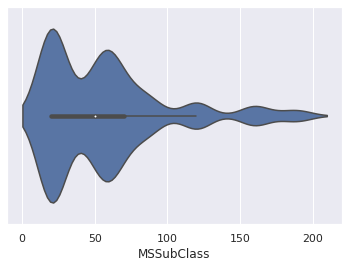

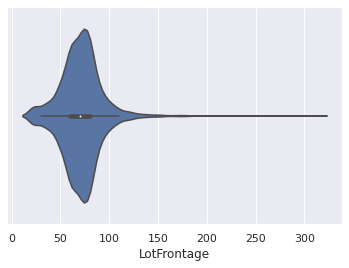

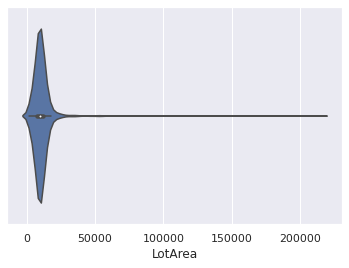

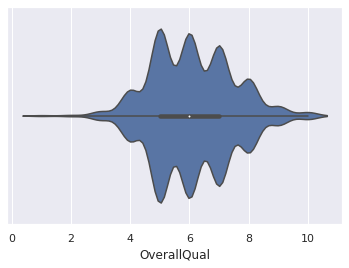

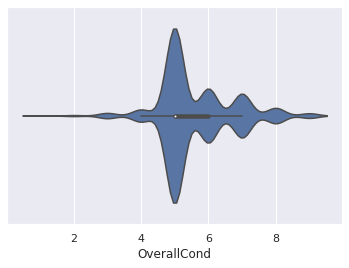

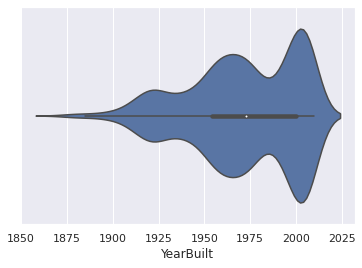

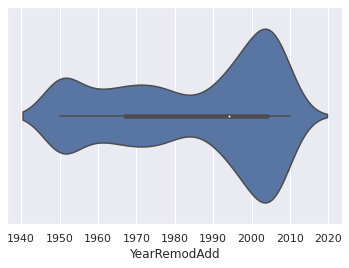

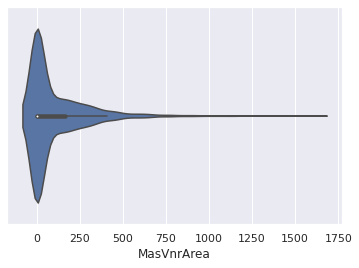

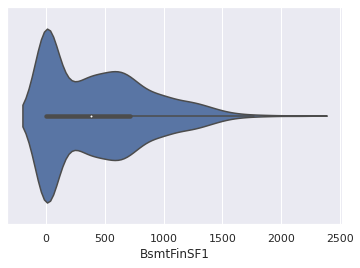

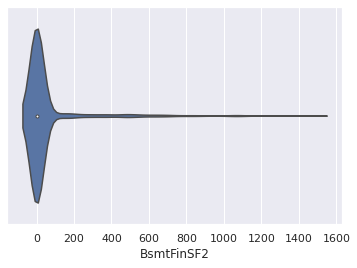

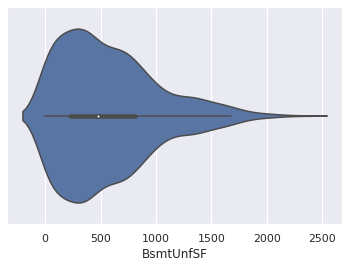

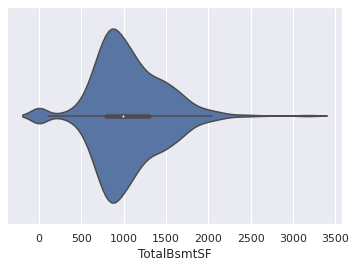

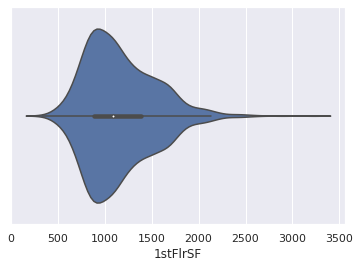

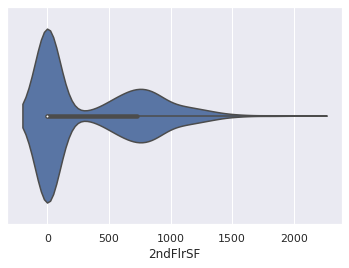

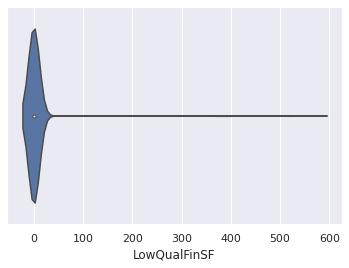

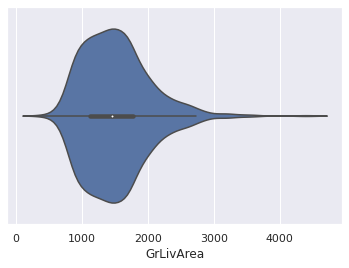

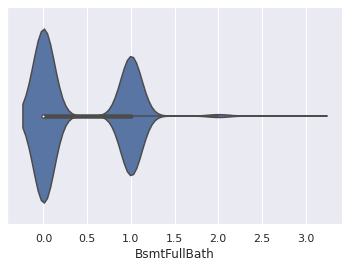

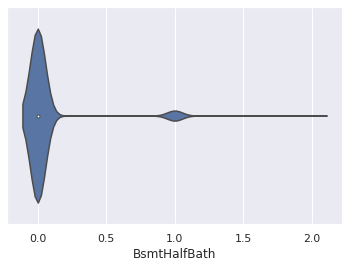

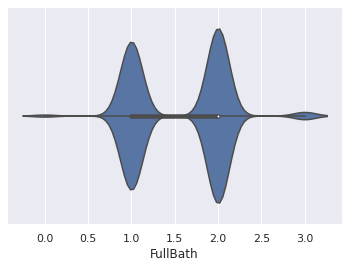

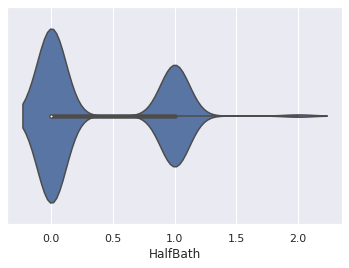

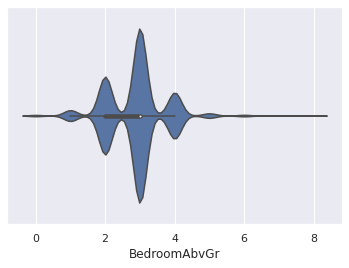

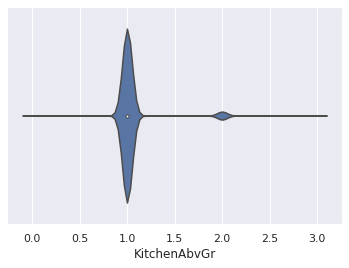

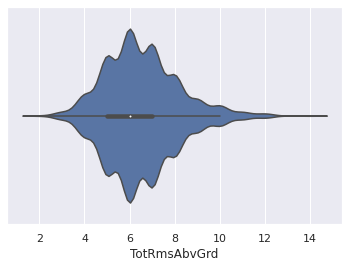

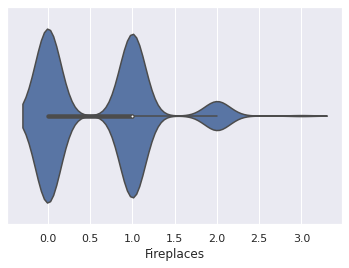

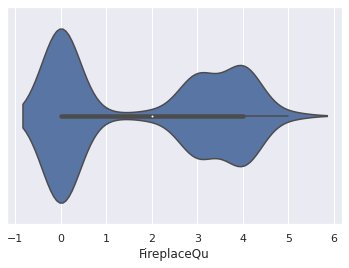

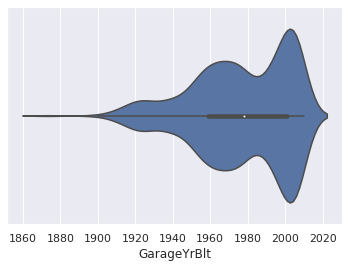

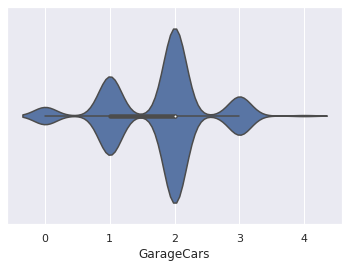

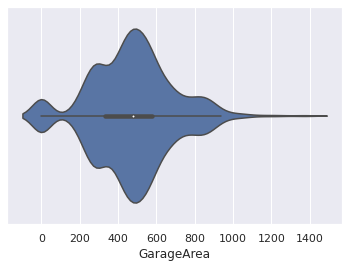

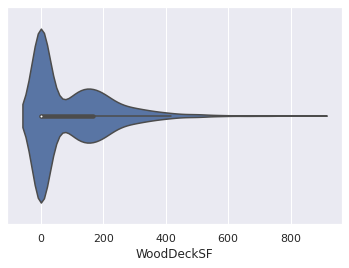

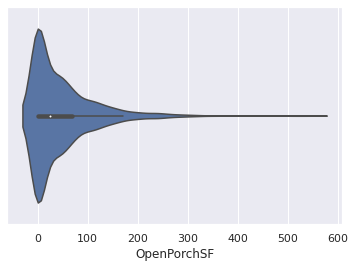

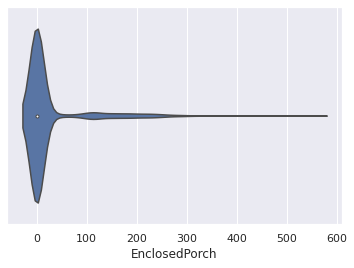

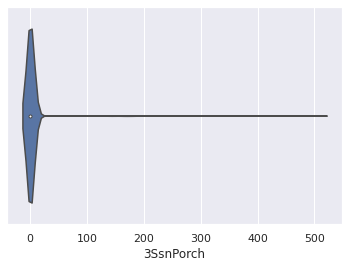

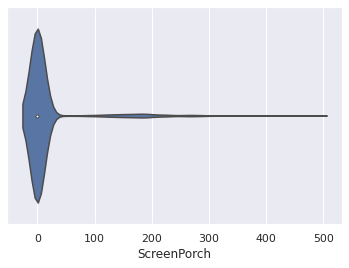

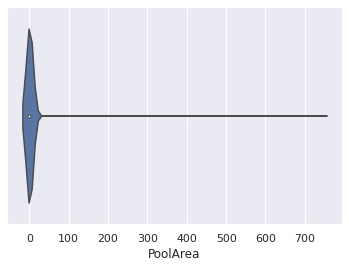

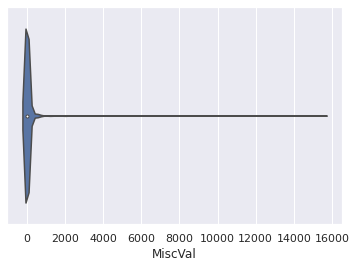

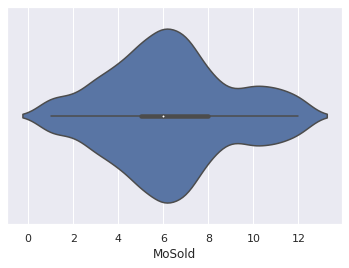

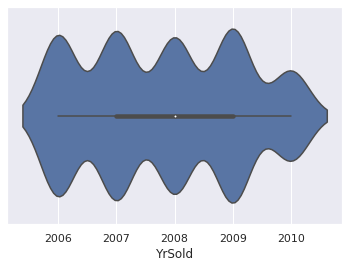

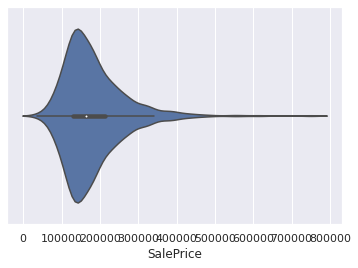

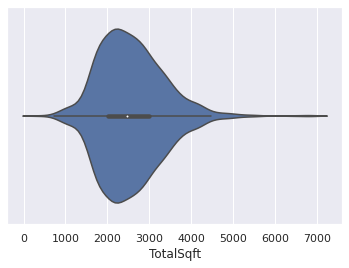

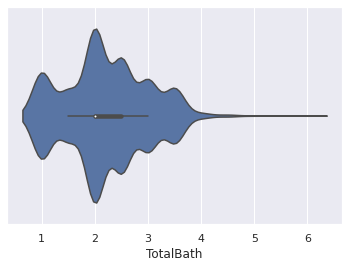

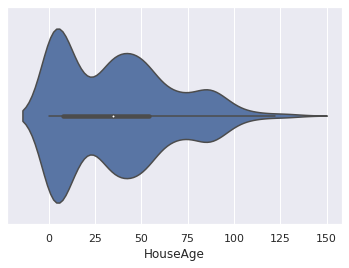

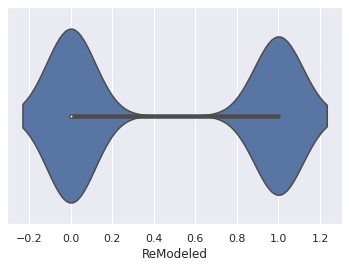

In [50]:
cols = dataset_numeric.columns

for c in cols:
  sns.violinplot(x=dataset_numeric[c])
  plt.xlabel(c)
  plt.show()

Looking at the above graphs, we can see that there are several data point that are negatively skewed to the left side of the distribution (ex: LotFrontage, LotArea, MasVnrArea, etc.). We would want to decrease the skew and make it closer to normal distribution.

In [51]:
# Skew Correction
#log1p function applies log(1+x) to all elements of the column
skew = df_train.select_dtypes(include=numerics).skew()

# disabling the pandas warning
pd.options.mode.chained_assignment = None

skewedfeatures = [s for s in skew if(s > 5.0)]
skewedfeatures

for skf in skewedfeatures:
  sk = skew[skew == skf].index[0]
  df_train[sk] = np.log1p(df_train[sk])

In [52]:
# Skew Correction for test set
#log1p function applies log(1+x) to all elements of the column
skew = df_test.select_dtypes(include=numerics).skew()

# disabling the pandas warning
pd.options.mode.chained_assignment = None

skewedfeatures = [s for s in skew if(s > 5.0)]
skewedfeatures

for skf in skewedfeatures:
  sk = skew[skew == skf].index[0]
  df_test[sk] = np.log1p(df_test[sk])

### Checking correlation betwenn numeric values

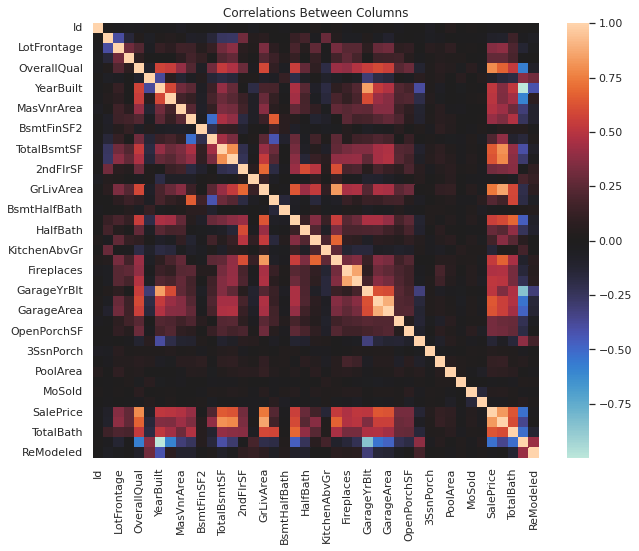

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset_numeric.corr(), center = 0)
plt.title("Correlations Between Columns")
plt.show()

In [54]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = dataset_numeric.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

size = 36

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

GarageCars and GarageArea = 0.89
Fireplaces and FireplaceQu = 0.86
YearBuilt and GarageYrBlt = 0.84
GrLivArea and TotRmsAbvGrd = 0.83
TotalBsmtSF and 1stFlrSF = 0.80
2ndFlrSF and GrLivArea = 0.69
BedroomAbvGr and TotRmsAbvGrd = 0.68
BsmtFinSF1 and BsmtFullBath = 0.66
GrLivArea and FullBath = 0.64
GarageYrBlt and GarageCars = 0.62
2ndFlrSF and TotRmsAbvGrd = 0.61
2ndFlrSF and HalfBath = 0.61
YearRemodAdd and GarageYrBlt = 0.60
GarageYrBlt and GarageArea = 0.60
OverallQual and GarageCars = 0.60
YearBuilt and YearRemodAdd = 0.59
OverallQual and GrLivArea = 0.59
OverallQual and YearBuilt = 0.57
OverallQual and GarageArea = 0.56
OverallQual and GarageYrBlt = 0.55
FullBath and TotRmsAbvGrd = 0.55
OverallQual and YearRemodAdd = 0.55
OverallQual and FullBath = 0.55
OverallQual and TotalBsmtSF = 0.54
GrLivArea and BedroomAbvGr = 0.54
YearBuilt and GarageCars = 0.54
1stFlrSF and GrLivArea = 0.53
BsmtFinSF1 and BsmtUnfSF = -0.52
2ndFlrSF and BedroomAbvGr = 0.50


From the above data, we can see that GarageCars and GarageArea are highly correlated. To limit the noise in our data set, we will make sure not to include GarageCars in our models.

### Create Dummy Variables for Categorical Data

In [55]:
dum_vars = ['Neighborhood', 'MSZoning', 'MSSubClass', 'Street', 
            'LotShape', 'LotConfig','Utilities', 'LandSlope', 
            'BldgType', 'HouseStyle', 'RoofStyle', 'Foundation', 
            'Heating', 'CentralAir', 'PavedDrive', 'MoSold', 
            'YrSold', 'SaleType', 'SaleCondition']

In [56]:
for col in dum_vars:
  print(col)
  train = sorted(df_train[col].unique().tolist())
  test = sorted(df_test[col].unique().tolist())
  total = set(train + test)
  df_train[col] = pd.Categorical(df_train[col], categories=total)
  df_test[col] = pd.Categorical(df_test[col], categories=total)

Neighborhood
MSZoning
MSSubClass
Street
LotShape
LotConfig
Utilities
LandSlope
BldgType
HouseStyle
RoofStyle
Foundation
Heating
CentralAir
PavedDrive
MoSold
YrSold
SaleType
SaleCondition


## Modeling

### Lasso Regression

In [58]:
# Feature(s) to look at
f1 = ['MSSubClass', 'LotFrontage', 'LotArea',
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
    'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
    'TotalSqft', 'TotalBath', 'HouseAge', 'ReModeled']

# Run a Linear Regression using the feature(s)
x1 = df_train[f1]
y = df_train['SalePrice']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x1, y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1093, 35), (365, 35), (1093,), (365,))

In [64]:
# Set up model
lasso = Lasso(alpha = 1.0, max_iter = 100)
kf = KFold(n_splits=7, shuffle=True)

# Standardize the data
ss = StandardScaler()
ss_train = ss.fit_transform(x_train)
ss_test = ss.transform(x_test)

# cross validate 
scores = cross_val_score(lasso, ss_train, y_train, cv=kf)
print(scores)
print(f'Mean Score: {scores.mean()}; SD: {scores.std()}')


lasso.fit(ss_train, y_train)
print(f'TRAIN Score: {lasso.score(ss_train, y_train)}')
print(f'TEST Score: {lasso.score(ss_test, y_test)}')

pred = lasso.predict(ss_test)
b, m = np.polynomial.polynomial.polyfit(y_test, pred, 1)

[0.87876909 0.84588905 0.81132675 0.82918162 0.87523088 0.83699647
 0.83258726]
Mean Score: 0.8442830191742308; SD: 0.022846354523587905
TRAIN Score: 0.8673260137014653
TEST Score: 0.8618294029601321


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.992e+11, tolerance: 5.920e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.147e+11, tolerance: 5.781e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

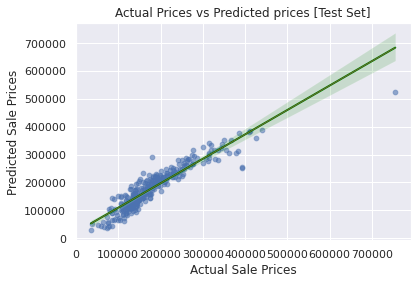

In [60]:
# Visualize the model results
sns.scatterplot(x=y_test, y=pred, alpha=0.4)
sns.regplot(x=y_test, y=pred, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, 
            line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(x=np.unique(y_test), y=np.unique(np.poly1d(b + m * np.unique(y_test))), linewidth=0.5, color='r')

plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual Prices vs Predicted prices [Test Set]")
 
plt.show()

#### Export Prediction

In [65]:
holdout_df = df_test[f1]

# Standardize the numeric columns
ss = StandardScaler()
ss_holdout = ss.fit_transform(holdout_df)

# predict SalePrice
predict = lasso.predict(ss_holdout)
submit = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predict})
submit

#export to csv
submit.to_csv('./drive/MyDrive/Colab Notebooks/House_Price_EDA/lasso_submission.csv',index=False)

### Ridge Regresshion

In [67]:
# Feature(s) to look at
f2 = ['MSSubClass', 'LotFrontage', 'LotArea',
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
    'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
    'TotalSqft', 'TotalBath', 'HouseAge', 'ReModeled']

# Run a Linear Regression using the feature(s)
x2 = df_train[f2]
y = df_train['SalePrice']

# Split the data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((1093, 35), (365, 35), (1093,), (365,))

In [69]:
# Set up model
ridge_reg = Ridge(alpha=1, solver="cholesky")
kf = KFold(n_splits=7, shuffle=True)

# Standardize the data
ss = StandardScaler()
ss_train2 = ss.fit_transform(x2_train)
ss_test2 = ss.transform(x2_test)

# cross validate 
scores = cross_val_score(ridge_reg, ss_train2, y2_train, cv=kf)
print(scores)
print(f'Mean Score: {scores.mean()}; SD: {scores.std()}')


ridge_reg.fit(ss_train2, y2_train)
print(f'TRAIN Score: {ridge_reg.score(ss_train2, y2_train)}')
print(f'TEST Score: {ridge_reg.score(ss_test2, y2_test)}')

pred2 = ridge_reg.predict(ss_test2)
b, m = np.polynomial.polynomial.polyfit(y2_test, pred2, 1)

[0.82459928 0.84181799 0.85932193 0.83691302 0.88697633 0.87507103
 0.83241333]
Mean Score: 0.8510161290444874; SD: 0.021607465841661986
TRAIN Score: 0.8658659799031824
TEST Score: 0.8556533922501266


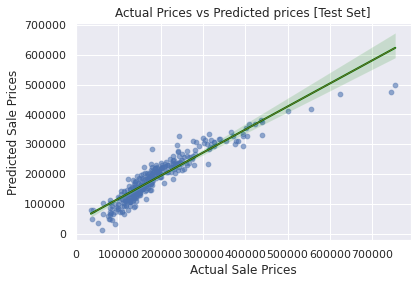

In [70]:
# Visualize the model results
sns.scatterplot(x=y2_test, y=pred2, alpha=0.4)
sns.regplot(x=y2_test, y=pred2, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, 
            line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(x=np.unique(y2_test), y=np.unique(np.poly1d(b + m * np.unique(y2_test))), linewidth=0.5, color='r')

plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual Prices vs Predicted prices [Test Set]")
 
plt.show()

#### Export Prediction

In [72]:
holdout_df2 = df_test[f2]

# Standardize the numeric columns
ss = StandardScaler()
ss_holdout2 = ss.fit_transform(holdout_df2)

# predict SalePrice
predict2 = ridge_reg.predict(ss_holdout2)
submit2 = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predict2})
submit2

#export to csv
submit2.to_csv('./drive/MyDrive/Colab Notebooks/House_Price_EDA/ridge_submission.csv',index=False)